In [50]:
import os
from datetime import datetime as dt
from glob import glob

import rasterio as rio
import xarray as xr
from pre_processing.cruts_config import CRUTSConfig
from rasterio.mask import mask
from rasterio.plot import show

% matplotlib inline

UsageError: Line magic function `%` not found.


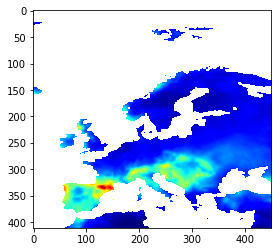

In [51]:
europe_bbox = ((-16, 84.25), (40.25, 32.875))
left_upper = [-16, 84.25]
left_lower = [-16, 32.875]
right_upper = [40.25, 84.25]
right_lower = [40.25, 32.875]
inference_dir = "/media/xultaeculcis/2TB/datasets/cruts/inference"
bbox = [
    {
        "coordinates": [[left_upper, right_upper, right_lower, left_lower, left_upper]],
        "type": "Polygon",
    }
]

for var in CRUTSConfig.variables_cts:
    files = sorted(glob(os.path.join(inference_dir, var, "*.tif")))
    for fp in files:
        filename = os.path.basename(fp)
        splitted = filename.replace(".tif", "").split("-")
        year = splitted[2]
        month = splitted[3]
        day = splitted[4]
        timestamp = dt(int(year), int(month), int(day))

        with rio.open(
            "/media/xultaeculcis/2TB/datasets/cruts/inference/pre/cruts-pre-1942-04-16.tif"
        ) as ds:
            # show(raster, cmap="jet")
            crop, transform = mask(ds, bbox, crop=True)
            meta = ds.meta

        meta.update(
            {
                "driver": "GTiff",
                "height": crop.shape[1],
                "width": crop.shape[2],
                "transform": transform,
            }
        )

        show(crop, cmap="jet")

        with rio.open(os.path.join(".", filename), "w", **meta) as dest:
            dest.write(crop)

        break
    break

In [52]:
xr.open_rasterio("./cruts-tmn-1969-02-15.tif")

<xarray.DataArray (band: 1, y: 411, x: 450)>
[184950 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 84.19 84.06 83.94 83.81 ... 33.31 33.19 33.06 32.94
  * x        (x) float64 -15.94 -15.81 -15.69 -15.56 ... 39.81 39.94 40.06 40.19
Attributes:
    transform:      (0.125, 0.0, -16.0, 0.0, -0.125, 84.25)
    crs:            +init=epsg:4326
    res:            (0.125, 0.125)
    is_tiled:       0
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area